In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
all_matches = pd.DataFrame()

In [3]:
matches = pd.read_csv(f'data/premier league/E0 (5).csv')
matches.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
0,E0,13/08/05,Aston Villa,Bolton,2,2,D,2,2,D,...,2.20,2.01,1.87,1.70,22,-0.25,2.10,2.01,1.92,1.84
1,E0,13/08/05,Everton,Man United,0,2,A,0,1,A,...,2.10,1.93,1.87,1.79,23,0.75,2.05,2.00,1.93,1.86
2,E0,13/08/05,Fulham,Birmingham,0,0,D,0,0,D,...,2.24,2.04,1.77,1.69,21,0.00,1.85,1.81,2.11,2.05
3,E0,13/08/05,Man City,West Brom,0,0,D,0,0,D,...,2.10,1.94,1.90,1.77,23,-0.75,2.19,2.10,1.83,1.76
4,E0,13/08/05,Middlesbrough,Liverpool,0,0,D,0,0,D,...,2.23,2.02,1.80,1.71,21,0.25,1.89,1.86,2.04,2.00


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 68 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       380 non-null    object 
 1   Date      380 non-null    object 
 2   HomeTeam  380 non-null    object 
 3   AwayTeam  380 non-null    object 
 4   FTHG      380 non-null    int64  
 5   FTAG      380 non-null    int64  
 6   FTR       380 non-null    object 
 7   HTHG      380 non-null    int64  
 8   HTAG      380 non-null    int64  
 9   HTR       380 non-null    object 
 10  Referee   380 non-null    object 
 11  HS        380 non-null    int64  
 12  AS        380 non-null    int64  
 13  HST       380 non-null    int64  
 14  AST       380 non-null    int64  
 15  HF        380 non-null    int64  
 16  AF        380 non-null    int64  
 17  HC        380 non-null    int64  
 18  AC        380 non-null    int64  
 19  HY        380 non-null    int64  
 20  AY        380 non-null    int64 

In [5]:
columns_missing_values = {}
missing_columns = []
counts = []

In [6]:
import os

for file in os.listdir('data/premier league'):
    if file.endswith('.csv'):
        matches = pd.read_csv(f'data/premier league/{file}')
        all_matches = pd.concat([all_matches, matches])

In [7]:
all_matches = all_matches[pd.notna(all_matches['HomeTeam'])]
columns = all_matches.columns

In [8]:
for column in columns:
    num = all_matches[column].isna().sum()
    if num:
        missing_columns.append(column)
        counts.append(num)
        columns_missing_values[column] = num

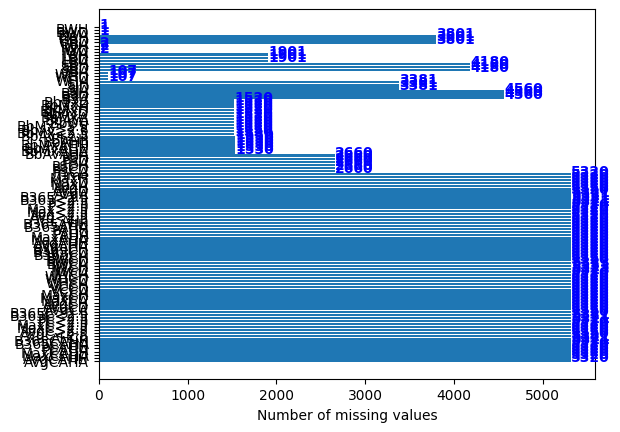

In [9]:
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(missing_columns))

for i, v in enumerate(counts):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

ax.barh(y_pos, counts, align='center')
ax.set_yticks(y_pos, labels=missing_columns)
ax.invert_yaxis() 
ax.set_xlabel('Number of missing values')
plt.show()

In [10]:
{col: c for col, c in zip(missing_columns,  counts)}

{'BWH': 1,
 'BWD': 1,
 'BWA': 1,
 'GBH': 3801,
 'GBD': 3801,
 'GBA': 3801,
 'IWH': 2,
 'IWD': 2,
 'IWA': 2,
 'LBH': 1901,
 'LBD': 1901,
 'LBA': 1901,
 'SBH': 4180,
 'SBD': 4180,
 'SBA': 4180,
 'WHH': 107,
 'WHD': 107,
 'WHA': 107,
 'SJH': 3381,
 'SJD': 3381,
 'SJA': 3381,
 'BSH': 4560,
 'BSD': 4560,
 'BSA': 4560,
 'Bb1X2': 1520,
 'BbMxH': 1520,
 'BbAvH': 1520,
 'BbMxD': 1520,
 'BbAvD': 1520,
 'BbMxA': 1520,
 'BbAvA': 1520,
 'BbOU': 1520,
 'BbMx>2.5': 1520,
 'BbAv>2.5': 1520,
 'BbMx<2.5': 1520,
 'BbAv<2.5': 1520,
 'BbAH': 1530,
 'BbAHh': 1530,
 'BbMxAHH': 1530,
 'BbAvAHH': 1530,
 'BbMxAHA': 1530,
 'BbAvAHA': 1530,
 'PSH': 2660,
 'PSD': 2660,
 'PSA': 2660,
 'PSCH': 2660,
 'PSCD': 2660,
 'PSCA': 2660,
 'Time': 5320,
 'MaxH': 5320,
 'MaxD': 5320,
 'MaxA': 5320,
 'AvgH': 5320,
 'AvgD': 5320,
 'AvgA': 5320,
 'B365>2.5': 5321,
 'B365<2.5': 5321,
 'P>2.5': 5321,
 'P<2.5': 5321,
 'Max>2.5': 5320,
 'Max<2.5': 5320,
 'Avg>2.5': 5320,
 'Avg<2.5': 5320,
 'AHh': 5320,
 'B365AHH': 5320,
 'B365AHA': 5

In [11]:
all_matches

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,13/08/11,Blackburn,Wolves,1.0,2.0,A,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,13/08/11,Fulham,Aston Villa,0.0,0.0,D,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,13/08/11,Liverpool,Sunderland,1.0,1.0,D,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,13/08/11,Newcastle,Arsenal,0.0,0.0,D,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,13/08/11,QPR,Bolton,0.0,4.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,19/05/13,Swansea,Fulham,0.0,3.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376,E0,19/05/13,Tottenham,Sunderland,1.0,0.0,H,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377,E0,19/05/13,West Brom,Man United,5.0,5.0,D,1.0,3.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378,E0,19/05/13,West Ham,Reading,4.0,2.0,H,2.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
teams = np.unique(all_matches['HomeTeam'].values.tolist())
len(teams)

42

In [13]:
teams

array(['Arsenal', 'Aston Villa', 'Birmingham', 'Blackburn', 'Blackpool',
       'Bolton', 'Bournemouth', 'Brentford', 'Brighton', 'Burnley',
       'Cardiff', 'Charlton', 'Chelsea', 'Crystal Palace', 'Derby',
       'Everton', 'Fulham', 'Huddersfield', 'Hull', 'Leeds', 'Leicester',
       'Liverpool', 'Man City', 'Man United', 'Middlesbrough',
       'Newcastle', 'Norwich', "Nott'm Forest", 'Portsmouth', 'QPR',
       'Reading', 'Sheffield United', 'Southampton', 'Stoke',
       'Sunderland', 'Swansea', 'Tottenham', 'Watford', 'West Brom',
       'West Ham', 'Wigan', 'Wolves'], dtype='<U16')

In [14]:
all_matches['Date'] = pd.to_datetime(all_matches['Date'])
all_matches = all_matches.sort_values(by='Date')

/var/folders/dv/3lz4fq1n7sv4p3rrxgbjgpth0000gn/T/ipykernel_5050/3488603060.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_matches['Date'] = pd.to_datetime(all_matches['Date'])


In [15]:
columns.values

array(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D',
       'B365A', 'BWH', 'BWD', 'BWA', 'GBH', 'GBD', 'GBA', 'IWH', 'IWD',
       'IWA', 'LBH', 'LBD', 'LBA', 'SBH', 'SBD', 'SBA', 'WHH', 'WHD',
       'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'BSH', 'BSD',
       'BSA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA',
       'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5',
       'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSH',
       'PSD', 'PSA', 'PSCH', 'PSCD', 'PSCA', 'Time', 'MaxH', 'MaxD',
       'MaxA', 'AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5',
       'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh',
       'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH',
       'AvgAHA', 'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA',
       'IW

In [16]:
all_matches = all_matches.drop(missing_columns, axis=1)
all_matches.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'VCH', 'VCD',
       'VCA'],
      dtype='object')

In [17]:
all_matches = all_matches.drop(["Referee", "Div"], axis=1)
all_matches.columns


Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'B365H', 'B365D', 'B365A', 'VCH', 'VCD', 'VCA'],
      dtype='object')

In [18]:
len(all_matches.columns)

27

In [19]:
all_matches.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HY,AY,HR,AR,B365H,B365D,B365A,VCH,VCD,VCA
69,2005-01-10,Portsmouth,Newcastle,0.0,0.0,D,0.0,0.0,D,10.0,...,1.0,2.0,0.0,0.0,2.8,3.25,2.40,2.9,3.25,2.35
67,2005-01-10,Charlton,Tottenham,2.0,3.0,A,1.0,0.0,H,9.0,...,3.0,2.0,0.0,0.0,2.5,3.20,2.75,2.5,3.20,2.70
68,2005-01-10,Fulham,Man United,2.0,3.0,A,2.0,3.0,A,11.0,...,2.0,1.0,0.0,0.0,5.0,3.60,1.66,5.5,3.60,1.60
70,2005-01-10,Sunderland,West Ham,1.0,1.0,D,1.0,0.0,H,16.0,...,1.0,5.0,0.0,0.0,2.5,3.20,2.75,2.5,3.25,2.65
66,2005-01-10,Blackburn,West Brom,2.0,0.0,H,0.0,0.0,D,20.0,...,2.0,0.0,0.0,0.0,1.8,3.30,4.50,1.7,3.40,5.00


In [20]:
bad_bets = {
    "B365": 0,
    "VC": 0
}

for id_, row in all_matches.iterrows():
    for stakeholder in bad_bets.keys():
        win_draw_loss = np.argmin([row[f"{stakeholder}H"], row[f"{stakeholder}D"], row[f"{stakeholder}A"]])

        if win_draw_loss == 0 and row["FTR"] != "H":
            bad_bets[stakeholder] += 1
        elif win_draw_loss == 1 and row["FTR"] != "D":
            bad_bets[stakeholder] += 1
        elif win_draw_loss == 2 and row["FTR"] != "A":
            bad_bets[stakeholder] += 1

    
bad_bets

{'B365': 3087, 'VC': 3086}

In [21]:
len(all_matches)

6840

In [22]:
bad_bets["B365"]/len(all_matches)

0.4513157894736842

In [23]:
bad_bets["VC"]/len(all_matches)

0.45116959064327483

In [24]:
all_matches = all_matches.drop(["B365H","B365D", "B365A", "VCH", "VCD", "VCA"], axis=1)
len(all_matches.columns)

21

In [25]:
def initialize_table(matches: pd.DataFrame):
    table = {}
    for _, row in matches.iterrows():
        if row["HomeTeam"] not in table:
            table[row["HomeTeam"]] = {
                "matches_played": 0,
                "points": 0,
                "wins": 0,
                "losses": 0,
                "draws": 0,
                "scored_goals": 0,
                "lost_goals": 0,
            }
        if row["AwayTeam"] not in table:
            table[row["AwayTeam"]] = {
                "matches_played": 0,
                "points": 0,
                "wins": 0,
                "losses": 0,
                "draws": 0,
                "scored_goals": 0,
                "lost_goals": 0,
            }
    return table

def get_table(current_match, all_matches: pd.DataFrame):
    table = initialize_table(all_matches)

    matches = all_matches[all_matches["Date"] < current_match["Date"]]

    for _, row in matches.iterrows():
        home = row["HomeTeam"]
        away = row['AwayTeam']

        table[home]["matches_played"] += 1
        table[away]["matches_played"] += 1

        table[home]["scored_goals"] += row["FTHG"]
        table[away]["scored_goals"] += row["FTAG"]

        table[away]["lost_goals"] += row["FTHG"]
        table[home]["lost_goals"] += row["FTAG"]
        
        if row["FTR"] == "H":
            table[home]["points"] += 3
            table[home]["wins"] += 1
            table[away]["losses"] += 1
        elif row["FTR"] == "D":
            table[home]["points"] += 1
            table[away]["points"] += 1
            table[home]["draws"] += 1
            table[away]["draws"] += 1
        else:
            table[away]["points"] += 3
            table[away]["wins"] += 1
            table[home]["losses"] += 1

    return table


In [26]:
def get_position(team: str, table: dict):
    sorted_table = sorted(table.items(), key=lambda x: (x[1]["points"], x[1]["scored_goals"]-x[1]["lost_goals"]), reverse=True)
    return [item[0] for item in sorted_table].index(team)+1

In [27]:
def get_5_matches_ab(row: pd.Series, matches: pd.DataFrame):
    data = {}

    home = row['HomeTeam']
    away = row['AwayTeam']

    last_5_matches_between_a_and_b = matches[(matches["Date"] < row["Date"]) &
                                                  (((matches["AwayTeam"] ==  away) & (matches["HomeTeam"] ==  home)) | \
                                                  ((matches["AwayTeam"] ==  home) & (matches["HomeTeam"] ==  away))) ].sort_values("Date", ascending=True)[-5:]

    data = {column: [0]*5 for column in matches.columns} 

    for row_idx, (_, row) in enumerate(last_5_matches_between_a_and_b.iterrows()):
        for column in matches.columns:
            if column == 'Date':
                data[column][row_idx] = row[column].strftime("%d/%m/%Y")
            else:
                data[column][row_idx] = row[column]
    
    return data


def get_5_matches_a(row: pd.Series, matches: pd.DataFrame):
    data = {}

    home = row['HomeTeam']

    data = {column: [0]*5 for column in matches.columns} 

    last_5_matches_of_a = matches[(matches["Date"] < row["Date"]) &
                                                  ((matches["AwayTeam"] ==  home) | (matches["HomeTeam"] ==  home))].sort_values("Date", ascending=True)[-5:]
    
    for row_idx, (_, row) in enumerate(last_5_matches_of_a.iterrows()):
        for column in matches.columns:
            if column == 'Date':
                data[column][row_idx] = row[column].strftime("%d/%m/%Y")
            else:
                data[column][row_idx] = row[column]
    
    return data


def get_5_matches_b(row: pd.Series, matches: pd.DataFrame):
    data = {}

    away = row['AwayTeam']

    data = {column: [0]*5 for column in matches.columns} 

    last_5_matches_of_a = matches[(matches["Date"] < row["Date"]) &
                                                  ((matches["AwayTeam"] ==  away) | (matches["HomeTeam"] == away))].sort_values("Date", ascending=True)[-5:]
    
    for row_idx, (_, row) in enumerate(last_5_matches_of_a.iterrows()):
        for column in matches.columns:
            if column == 'Date':
                data[column][row_idx] = row[column].strftime("%d/%m/%Y")
            else:
                data[column][row_idx] = row[column]

    return data

In [39]:
data = []

for file in os.listdir('data/premier league'):
    if file.endswith('.csv'):
        matches = pd.read_csv(f'data/premier league/{file}')

        for col in missing_columns:
            if col in matches.columns:
                matches = matches.drop([col], axis=1)
        
        bets = matches[["B365H","B365D", "B365A", "VCH", "VCD", "VCA"]]
        matches = matches.drop(["Referee", "Div", "B365H","B365D", "B365A", "VCH", "VCD", "VCA",], axis=1)
        matches = matches.fillna(0)
        matches['Date'] = pd.to_datetime(matches['Date'], dayfirst=True)

    
        for idx, row in matches.iterrows():
            home = row['HomeTeam']
            away = row['AwayTeam']

            table = get_table(row, matches)

            data_item = {
                "match": {
                    "HomeTeam": home,
                    "AwayTeam": away,
                    "FTR": row["FTR"],
                    "HomeTeamData": {**table[home], "position": get_position(home, table)},
                    "AwayTeamData": {**table[away], "position": get_position(away, table)},
                },
                "table": table,
                "matches_ab": get_5_matches_ab(row, all_matches),
                "matches_a": get_5_matches_a(row, matches),
                "matches_b": get_5_matches_b(row, matches),
                "bets": bets.iloc[idx].values.tolist()
            }

            data.append(data_item)        

/var/folders/dv/3lz4fq1n7sv4p3rrxgbjgpth0000gn/T/ipykernel_5050/1012678739.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  matches['Date'] = pd.to_datetime(matches['Date'], dayfirst=True)
/var/folders/dv/3lz4fq1n7sv4p3rrxgbjgpth0000gn/T/ipykernel_5050/1012678739.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  matches['Date'] = pd.to_datetime(matches['Date'], dayfirst=True)
/var/folders/dv/3lz4fq1n7sv4p3rrxgbjgpth0000gn/T/ipykernel_5050/1012678739.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  matches['Date'] = pd.to_datetime(matches['Date'], dayfirst=True)
/

In [40]:
len(data)

6841

In [41]:
import json

with open("new_data.json", "w") as f:
    json.dump(data, f)

In [ ]:
all_matches['Date'] = all_matches['Date'].dt.strftime('%Y-%m-%d')

In [42]:
all_matches

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HY,AY,HR,AR,B365H,B365D,B365A,VCH,VCD,VCA
66,2005-01-10,Blackburn,West Brom,2.0,0.0,H,0.0,0.0,D,20.0,...,2.0,0.0,0.0,0.0,1.80,3.30,4.50,1.70,3.4,5.00
67,2005-01-10,Charlton,Tottenham,2.0,3.0,A,1.0,0.0,H,9.0,...,3.0,2.0,0.0,0.0,2.50,3.20,2.75,2.50,3.2,2.70
66,2005-01-10,Blackburn,West Brom,2.0,0.0,H,0.0,0.0,D,20.0,...,2.0,0.0,0.0,0.0,1.80,3.30,4.50,1.70,3.4,5.00
67,2005-01-10,Charlton,Tottenham,2.0,3.0,A,1.0,0.0,H,9.0,...,3.0,2.0,0.0,0.0,2.50,3.20,2.75,2.50,3.2,2.70
67,2005-01-10,Charlton,Tottenham,2.0,3.0,A,1.0,0.0,H,9.0,...,3.0,2.0,0.0,0.0,2.50,3.20,2.75,2.50,3.2,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,2023-12-03,Newcastle,Wolves,2.0,1.0,H,1.0,0.0,H,19.0,...,1.0,2.0,0.0,0.0,1.65,3.75,5.50,1.62,3.5,5.50
258,2023-12-03,Man United,Southampton,0.0,0.0,D,0.0,0.0,D,10.0,...,2.0,0.0,0.0,0.0,1.36,5.00,9.00,1.30,4.8,9.00
257,2023-12-03,Fulham,Arsenal,0.0,3.0,A,0.0,3.0,A,12.0,...,0.0,1.0,0.0,0.0,6.00,4.00,1.57,5.75,3.9,1.53
257,2023-12-03,Fulham,Arsenal,0.0,3.0,A,0.0,3.0,A,12.0,...,0.0,1.0,0.0,0.0,6.00,4.00,1.57,5.75,3.9,1.53


In [43]:
import json


data = []


for id_, row in all_matches.sort_values("Date", ascending=True).iterrows():
    home = row['HomeTeam']
    away = row['AwayTeam']

    data_item = {}
    data_item["match"] = {column: row[column] for column in all_matches.columns}

    # ///////////////////

    last_5_matches_between_a_and_b = all_matches[(all_matches["Date"] < row["Date"]) &
                                                  (((all_matches["AwayTeam"] ==  away) & (all_matches["HomeTeam"] ==  home)) | \
                                                  ((all_matches["AwayTeam"] ==  home) & (all_matches["HomeTeam"] ==  away))) ].sort_values("Date", ascending=True)[-5:]

    data_item["last_5_matches_between_a_and_b"] = {column: [0]*5 for column in all_matches.columns} 

    for row_idx, (_, row) in enumerate(last_5_matches_between_a_and_b.iterrows()):
        for column in all_matches.columns:
            data_item["last_5_matches_between_a_and_b"][column][row_idx] = row[column]

    # ///////////////////

    data_item["last_5_matches_of_a"] = {column: [0]*5 for column in all_matches.columns} 

    last_5_matches_of_a = all_matches[(all_matches["Date"] < row["Date"]) &
                                                  ((all_matches["AwayTeam"] ==  home) | (all_matches["HomeTeam"] ==  home))].sort_values("Date", ascending=True)[-5:]
    
    for row_idx, (_, row) in enumerate(last_5_matches_of_a.iterrows()):
        for column in all_matches.columns:
            data_item["last_5_matches_of_a"][column][row_idx] = row[column]

    # ///////////////////

    data_item["last_5_matches_of_b"] = {column: [0]*5 for column in all_matches.columns} 

    last_5_matches_of_b = all_matches[(all_matches["Date"] < row["Date"]) &
                                                  ((all_matches["AwayTeam"] ==  away) | (all_matches["HomeTeam"] ==  away))].sort_values("Date", ascending=True)[-5:]
    
    for row_idx, (_, row) in enumerate(last_5_matches_of_b.iterrows()):
        for column in all_matches.columns:
            data_item["last_5_matches_of_b"][column][row_idx] = row[column]

    data.append(data_item)


with open("data.json", "w+") as f:
    json.dump(data, f)

KeyboardInterrupt: 

In [25]:
len(data)

6840